# Bank-Marketing-Campaign-Prediction

![image info](./Images/hdi_004_bankinstructions.png)

## Overview:

This project focuses on building a different classification model to predict the data which is related with direct marketing campaigns of a Portuguese banking organization. The marketing campaigns were based on phone calls. It also invloves finding the best model that helps in the prediction  of the bank term deposit.

## Business Problem:

The Portuguese banking organization has conducted a bank marketing campaign to all the customers through phone calls to place a term deposit. Now the organization needs help to predict if a customer would place a term deposit(yes) or not(no) after all the marketing effort taken.

## Approach and Methodology:

In this project we are following OSEMN data science workflow. It contains:
* Obtain (Generate data)
* Scrub (extracting columns,handling missing values)
* Explore (understanding data and create visualization)
* Model (building regression model)
* Interpret (communicating results)

### Obtain:

In [2]:
# import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np
import statsmodels as sm
import sklearn.preprocessing as preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from imblearn.over_sampling import SMOTE
%matplotlib inline
df=pd.read_csv('bank-additional-full.csv',sep=';',engine='python')
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
# varImpPlot(rf)

Attribute Information:
* bank client data:\
1 - age (numeric)\
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')\
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)\
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')\
5 - default: has credit in default? (categorical: 'no','yes','unknown')\
6 - housing: has housing loan? (categorical: 'no','yes','unknown')\
7 - loan: has personal loan? (categorical: 'no','yes','unknown')\
* related with the last contact of the current campaign:\
8 - contact: contact communication type (categorical: 'cellular','telephone')\
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')\
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')\
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.\
* other attributes:\
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)\
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)\
14 - previous: number of contacts performed before this campaign and for this client (numeric)\
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')\
* social and economic context attributes\
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)\
17 - cons.price.idx: consumer price index - monthly indicator (numeric)\
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)\
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)\
20 - nr.employed: number of employees - quarterly indicator (numeric)\

Output variable (desired target):\
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### Scrub:

In [7]:
df['age'].unique()

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89])

In [8]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

Data has lot of unknown category so instead of replacing, keep the unknown to check how model handles them 

In [9]:
len(df[df['job'] == 'unknown']) / len(df)

0.008012042342429833

In [10]:
df['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [11]:
len(df[df['marital'] == 'unknown'])/len(df)

0.0019423132951345051

In [12]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [13]:
len(df[df['education'] == 'unknown']) / len(df)

0.042026803923472855

In [14]:
df['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [15]:
len(df[df['housing'] == 'unknown']) / len(df)

0.0240361270272895

In [16]:
df['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [17]:
len(df[df['loan'] == 'unknown']) / len(df)

0.0240361270272895

In [18]:
df['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [19]:
len(df[df['default'] == 'unknown']) / len(df)

0.20872584247839177

Default column is having only 3 positive case and  has no useful informaion. hence deleting it

In [20]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [21]:
#Dropping default
df.drop('default', axis = 1, inplace = True)

In [22]:
df['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

'pdays' column having '999' which is customer was not previously contacted . Hence deleting  

In [23]:
len(df[df['pdays'] == 999]) / len(df)

0.9632174419733903

In [24]:
# deleting 'pdays'
df.drop('pdays', axis = 1, inplace = True)

'previous' column having just 8 positive cases and not useful for analysis.

In [25]:
df['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [26]:
#Deleting 'previous'
df.drop('previous', axis = 1, inplace = True)

In [27]:
df.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 18 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(3), object(10)
memory usage: 5.7+ MB


In [29]:
# selecting the numeric and categorical variable
cat_df = df.select_dtypes(include = 'object')
con_df = df.select_dtypes(include = ['int64', 'float64'])


In [30]:
#Generating numeric value for categorical variable
cat_df1 = pd.get_dummies(cat_df, drop_first = True)


In [31]:
#concatenating numeric and categorical columns 
df1 = pd.concat([con_df, cat_df1], axis = 1)

In [32]:
df1.columns

Index(['age', 'duration', 'campaign', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success', 'y_yes'],
      dtype='object')

## Explore:

In [33]:
df.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')

Let us have a look at the pairplot for the linear relationship between the variable

In [34]:
# sns.pairplot(data=df,hue='y')
# plt.legend()

In [35]:
# selecting categorical column for plotting
categorical_df=df[['job','marital','education','housing', 'loan','contact','month','day_of_week', 'campaign', 'poutcome']]

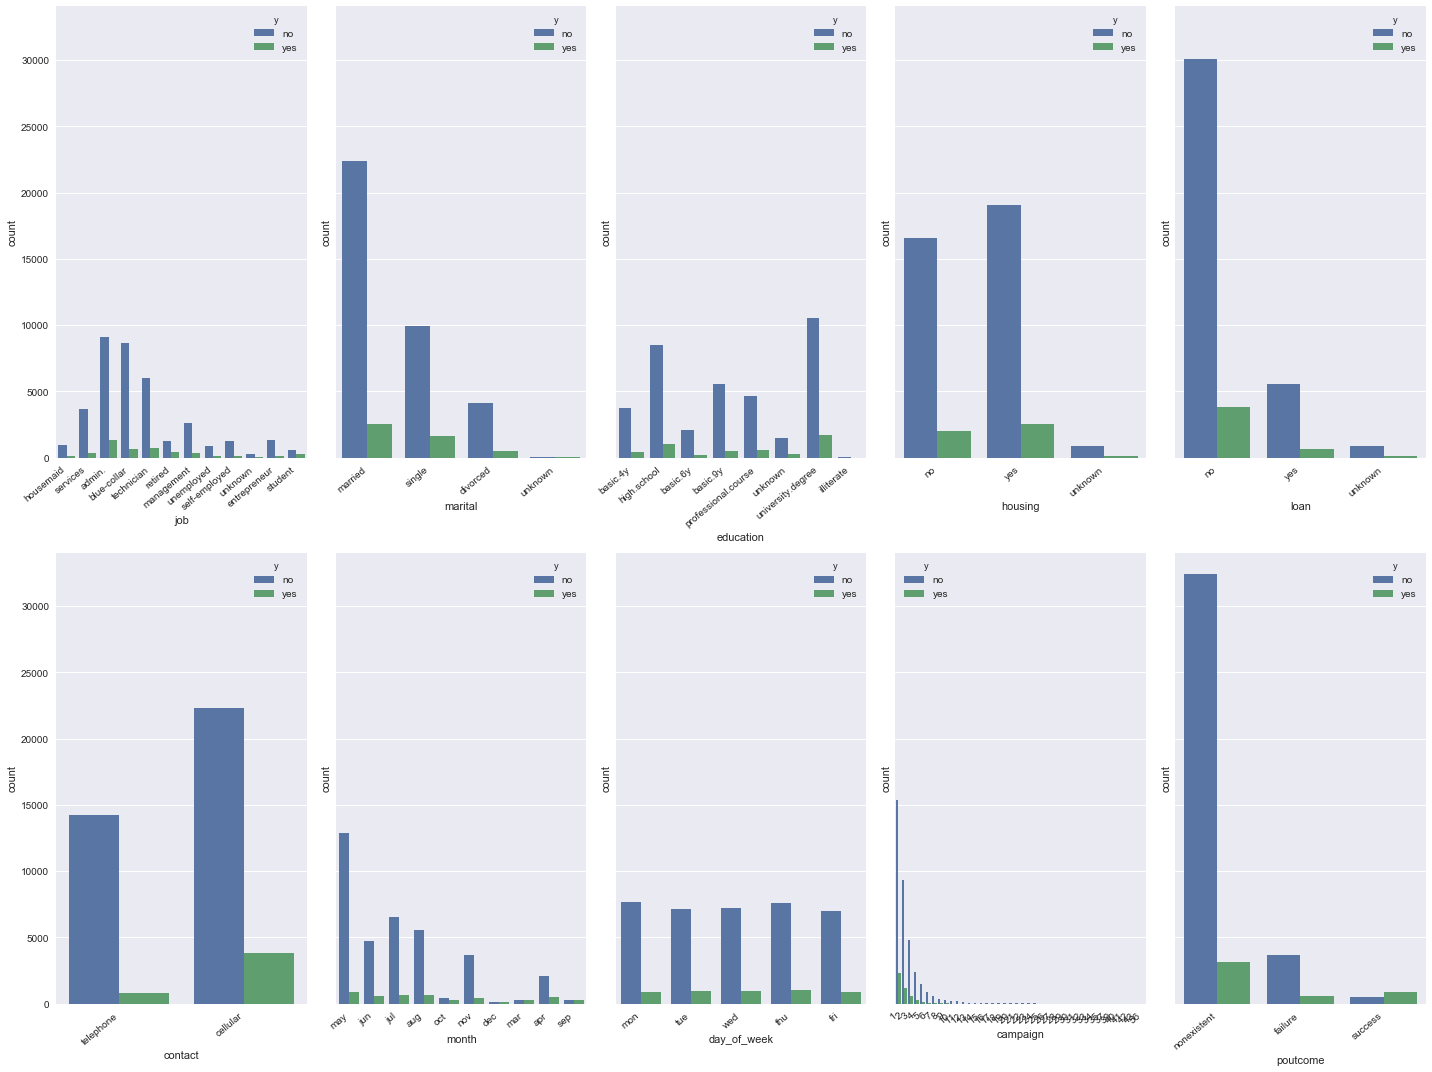

In [36]:
fig, axes = plt.subplots(2,5, figsize=(20, 15), sharey=True)
for col,ax in zip(categorical_df.columns,axes.flatten()):
    sns.countplot(x=col, hue='y',data=df,ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()

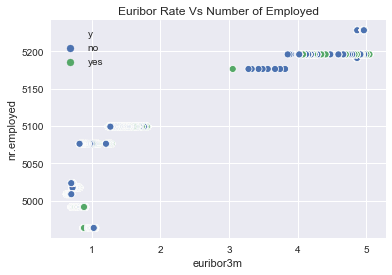

In [37]:
# plotting euribor and number of employee
sns.scatterplot(x='euribor3m',y='nr.employed',hue='y',data=df).set_title('Euribor Rate Vs Number of Employed')
plt.savefig('./Images/euvsnr.png', bbox_inches = 'tight')

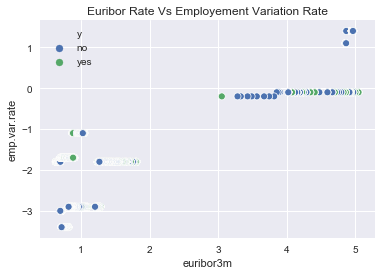

In [38]:
# plotting euribor and employee variation rate
sns.scatterplot(x='euribor3m',y='emp.var.rate',hue='y',data=df).set_title('Euribor Rate Vs Employement Variation Rate')
plt.savefig('./Images/euvsemp.png', bbox_inches = 'tight')

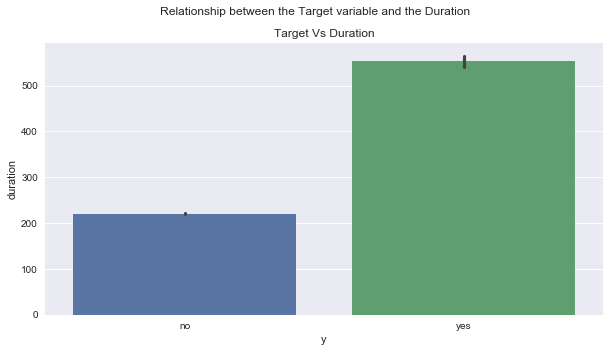

In [39]:
# plotting between the target variable and duration of the call
fig, axes = plt.subplots(figsize=(10, 5), sharey=True)
fig.suptitle('Relationship between the Target variable and the Duration')

sns.barplot(x=df['y'], y=df['duration']).set_title('Target Vs Duration')
plt.savefig('./Images/duration.png', bbox_inches = 'tight')

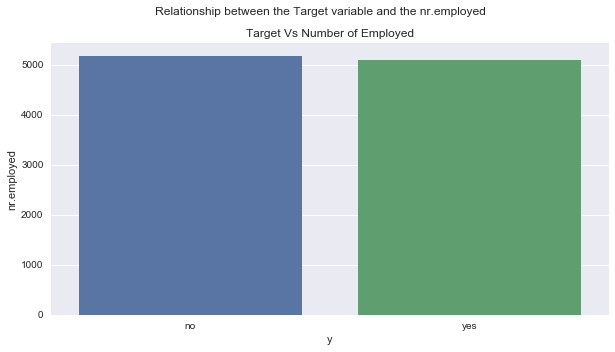

In [40]:
# plotting between target variable and number of employee
fig, axes = plt.subplots(figsize=(10, 5), sharey=True)
fig.suptitle('Relationship between the Target variable and the nr.employed')

sns.barplot(x=df['y'], y=df['nr.employed']).set_title('Target Vs Number of Employed')
plt.savefig('./Images/nremp.png', bbox_inches = 'tight')

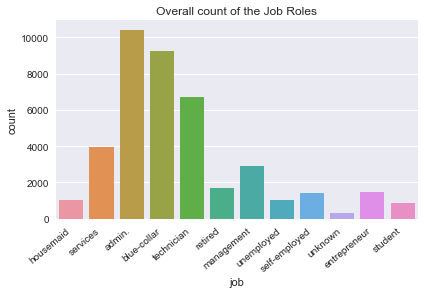

In [41]:
# Plotting the countplot for job 
ax = sns.countplot(x="job", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title('Overall count of the Job Roles')
plt.savefig('./Images/job.png', bbox_inches = 'tight')

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
age,1.000000,0.000866,0.004594,0.000371,0.000857,0.129372,0.010767,0.017725,0.024191,0.031213,...,0.030045,0.053008,0.040889,0.019027,0.021356,0.019137,0.023671,0.016376,0.035626,0.030399
duration,0.000866,1.000000,0.071699,0.027968,0.005312,0.008173,0.032897,0.044703,0.012992,0.003679,...,0.015941,0.015454,0.018011,0.023068,0.014666,0.004140,0.014537,0.011665,0.044876,0.405274
campaign,0.004594,0.071699,1.000000,0.150754,0.127836,0.013733,0.135133,0.144095,0.001775,0.002203,...,0.079028,0.049126,0.033953,0.014405,0.005141,0.025125,0.021088,0.087645,0.050893,0.066357
emp.var.rate,0.000371,0.027968,0.150754,1.000000,0.775334,0.196041,0.972245,0.906970,0.057264,0.009363,...,0.105917,0.213706,0.170366,0.018139,0.007673,0.014582,0.026797,0.472501,0.256886,0.298334
cons.price.idx,0.000857,0.005312,0.127836,0.775334,1.000000,0.058986,0.688230,0.522034,0.075322,0.009825,...,0.215273,0.092174,0.046905,0.001273,0.017143,0.001216,0.012479,0.304264,0.077416,0.136211
cons.conf.idx,0.129372,0.008173,0.013733,0.196041,0.058986,1.000000,0.277686,0.100513,0.101567,0.032306,...,0.052892,0.170425,0.169175,0.041382,0.027877,0.050033,0.023711,0.099724,0.084824,0.054878
euribor3m,0.010767,0.032897,0.135133,0.972245,0.688230,0.277686,1.000000,0.945154,0.046775,0.018744,...,0.019524,0.185937,0.190321,0.023279,0.013757,0.022732,0.030201,0.488406,0.281022,0.307771
nr.employed,0.017725,0.044703,0.144095,0.906970,0.522034,0.100513,0.945154,1.000000,0.063921,0.024581,...,0.027593,0.273236,0.292156,0.017433,0.002658,0.009923,0.023272,0.493051,0.350613,0.354678
job_blue-collar,0.024191,0.012992,0.001775,0.057264,0.075322,0.101567,0.046775,0.063921,1.000000,0.103050,...,0.062053,0.049034,0.054309,0.009754,0.007062,0.006829,0.020673,0.043843,0.061403,0.074423
job_entrepreneur,0.031213,0.003679,0.002203,0.009363,0.009825,0.032306,0.018744,0.024581,0.103050,1.000000,...,0.054461,0.010429,0.009172,0.006828,0.005551,0.007275,0.003480,0.007598,0.017238,0.016644


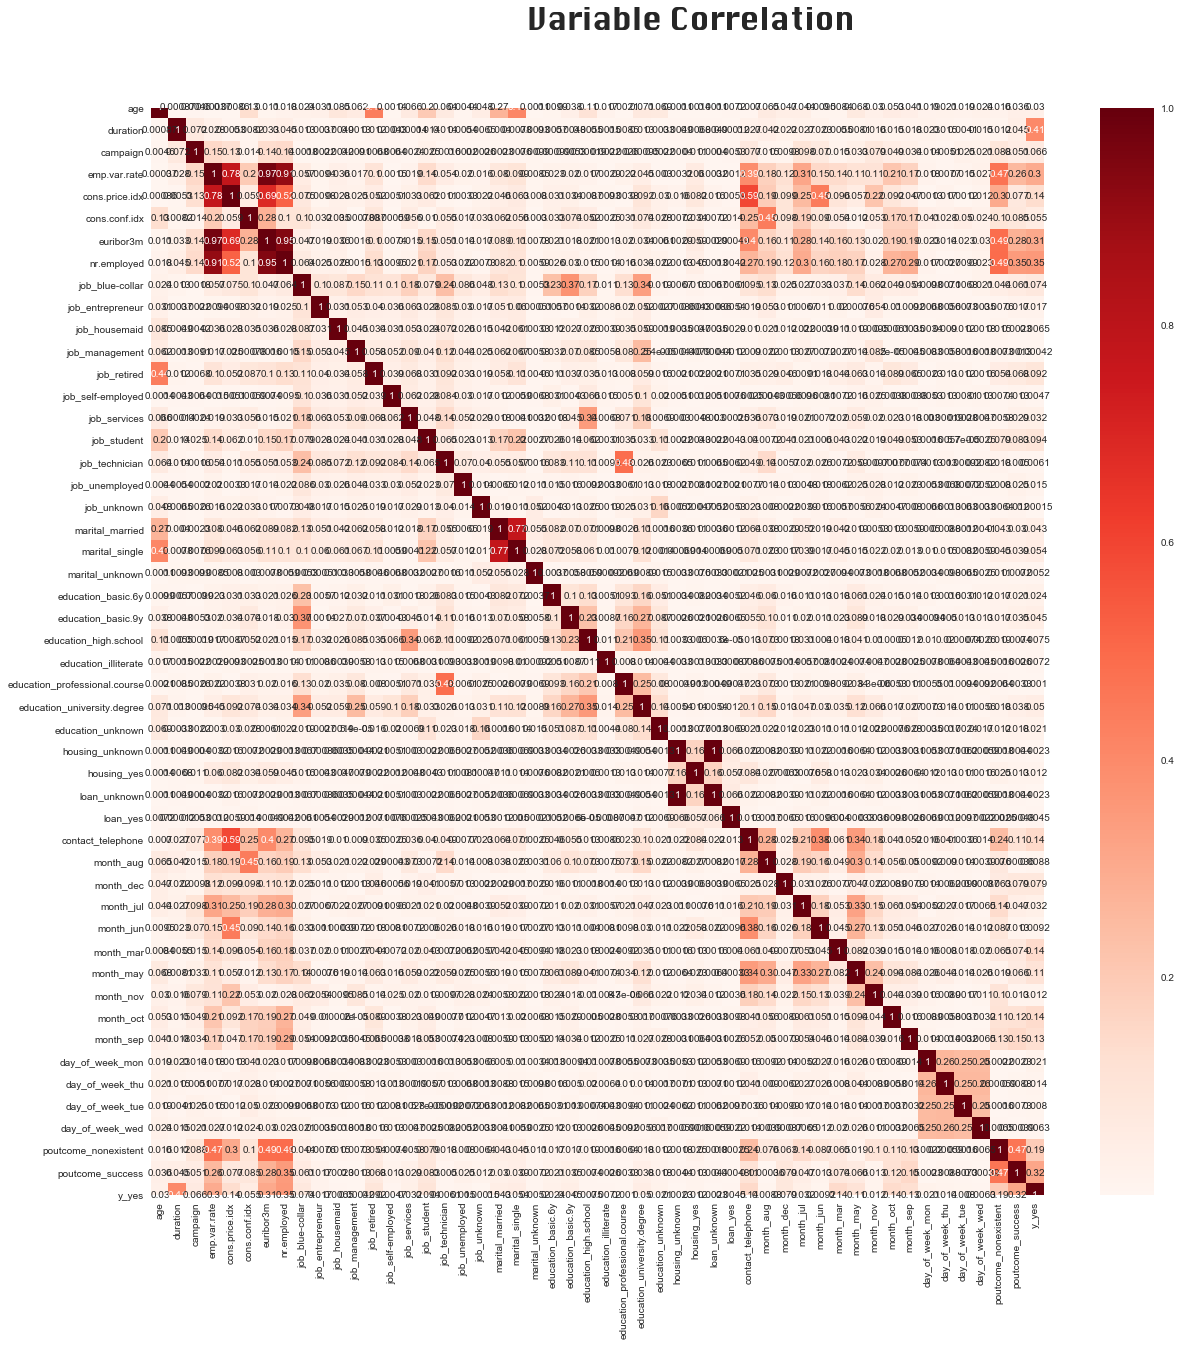

In [42]:
corr=df1.corr().abs()
fig,ax=plt.subplots(figsize=(20,20))
fig.suptitle('Variable Correlation',fontsize=30,y=.95,fontname='Silom')
heatmap=sns.heatmap(corr,cmap='Reds', annot = True)
corr

On looking at the heatmap, most of the variables are related to our target variable except the 'day_of_week' as it is not much useful in our analysis . Hence droppping it .

In [43]:
df1.drop(['day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed'],axis=1,inplace=True)

## Model

### Logistic Regression Model

#### BaseLine Model

In [43]:
# Splitting our data for train and test split
X = df1.drop('y_yes', axis = 1)
y = df1['y_yes']

In [44]:
# Scaling our data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [45]:
#fitting data into logistic regression model
logreg = LogisticRegression()
logreg.fit(X_scaled_train,y_train)

LogisticRegression()

In [46]:
#predicting the train and test data
train_pred = logreg.predict(X_scaled_train)
test_pred = logreg.predict(X_scaled_test)

In [47]:
#plotting confusion matrix
confusion_matrix(y_test, test_pred)

array([[8896,  248],
       [ 659,  494]])

In [48]:
#Calculating the accuracy score
print('Accuracy: ', accuracy_score(y_test, test_pred))

Accuracy:  0.9119160920656502


our dataset consist of imbalanced data has majority of values are 0. Hence applying SMOTE to handle data imbalance

In [49]:
df1['y_yes'].value_counts()

0    36548
1     4640
Name: y_yes, dtype: int64

In [50]:
df1['y_yes'].value_counts(normalize = True)

0    0.887346
1    0.112654
Name: y_yes, dtype: float64

#### Applying SMOTE

In [51]:
# Fitting the data
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_scaled_train, y_train)
        

Now the dataset looks balanced for modelling

In [52]:
y_train_resampled.value_counts()

1    27404
0    27404
Name: y_yes, dtype: int64

In [53]:
# Initializing Logistic Regression class object
logreg = LogisticRegression()
# Fitting the model
logreg.fit(X_train_resampled, y_train_resampled)


LogisticRegression()

In [54]:
# predicting the train and test data
train_preds = logreg.predict(X_train_resampled)
test_preds = logreg.predict(X_scaled_test)


In [55]:
#Calculating the accuracy score
print('Accuracy: ', accuracy_score(y_test, test_preds))

Accuracy:  0.8634553753520443


In [56]:
# model coefficient
logreg.coef_

array([[-6.04576916e-02,  1.96159009e+00, -1.86062795e-01,
        -4.30277396e+00,  1.84086798e+00,  7.90885796e-02,
         1.08040183e+00,  7.66372336e-01, -1.10188701e-01,
        -7.83115112e-02, -3.10029122e-02, -7.07388046e-02,
         8.62088907e-02, -1.11084459e-01, -7.13403606e-02,
         4.03144422e-02, -1.78095517e-02,  3.00563670e-02,
        -1.92989781e-02,  6.45793020e-02,  4.30400905e-02,
        -3.76495284e-02, -3.12154365e-02, -5.80864927e-02,
        -1.74702307e-02,  1.57736812e-02, -6.76580623e-03,
         1.45512400e-01, -9.41686060e-03, -5.85076971e-05,
         1.91375054e-02, -5.85076971e-05, -7.52649889e-02,
        -4.38832429e-01,  3.74575845e-01, -7.51170823e-03,
        -1.09541268e-01, -4.18197475e-01,  2.62041083e-01,
        -4.38395404e-01, -2.63387831e-01,  3.36266708e-02,
         4.22622942e-02,  2.29774489e-01,  3.59573277e-01]])

In [57]:
#creating dictionary to map the column values with the coefficient
dict(zip(X_train.columns, logreg.coef_[0]))

{'age': -0.060457691577720504,
 'duration': 1.9615900936249304,
 'campaign': -0.18606279548741153,
 'emp.var.rate': -4.302773957942973,
 'cons.price.idx': 1.8408679844110014,
 'cons.conf.idx': 0.07908857960040076,
 'euribor3m': 1.080401832124776,
 'nr.employed': 0.7663723359521112,
 'job_blue-collar': -0.11018870101177207,
 'job_entrepreneur': -0.0783115112423857,
 'job_housemaid': -0.03100291215003991,
 'job_management': -0.07073880460150617,
 'job_retired': 0.08620889065391892,
 'job_self-employed': -0.11108445875594274,
 'job_services': -0.07134036062771762,
 'job_student': 0.04031444218466732,
 'job_technician': -0.01780955171896827,
 'job_unemployed': 0.030056367015715842,
 'job_unknown': -0.01929897806184675,
 'marital_married': 0.06457930201910554,
 'marital_single': 0.0430400905333098,
 'marital_unknown': -0.037649528414791675,
 'education_basic.6y': -0.031215436495993697,
 'education_basic.9y': -0.05808649271111274,
 'education_high.school': -0.017470230665352266,
 'education_

In [58]:
# calculating confusion matrix
confusion_matrix(y_test, test_preds)

array([[7877, 1267],
       [ 139, 1014]])

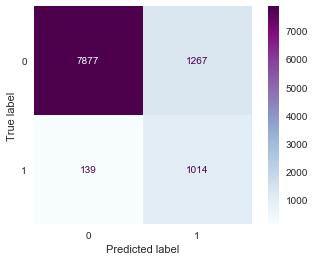

In [59]:
# plotting confusion matrix
plot_confusion_matrix(logreg, X_scaled_test, y_test,cmap = plt.cm.BuPu)
plt.grid(False)

####  Tuning for better prediction

Let us tune our model with different C values for better prediction

In [149]:
# Function for trying different values and tunning the model
def tuning_model(model,list_):
    
    train_preds = []
    test_preds = []
    for i in list_:
        model = LogisticRegression(C = i, solver = 'liblinear')
        model.fit(X_train_resampled, y_train_resampled )
        train_pred = model.predict(X_train_resampled)
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_resampled, model.predict_proba(X_train_resampled)[:, 1])
        roc_auc = auc(false_positive_rate, true_positive_rate)
        train_preds.append(roc_auc)
        test_pred = model.predict(X_scaled_test)
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, model.predict_proba(X_scaled_test)[:, 1])
        roc_auc = auc(false_positive_rate, true_positive_rate)
        test_preds.append(roc_auc)
    plt.figure(figsize = (12, 6))
    plt.plot(list_, train_preds, 'b', label = 'Train AUC')
    plt.plot(list_, test_preds, 'r', label = 'Test AUC')
    plt.ylabel('AUC score')
    plt.xlabel('Tunning Parameter')
    plt.legend()
    return plt.show()

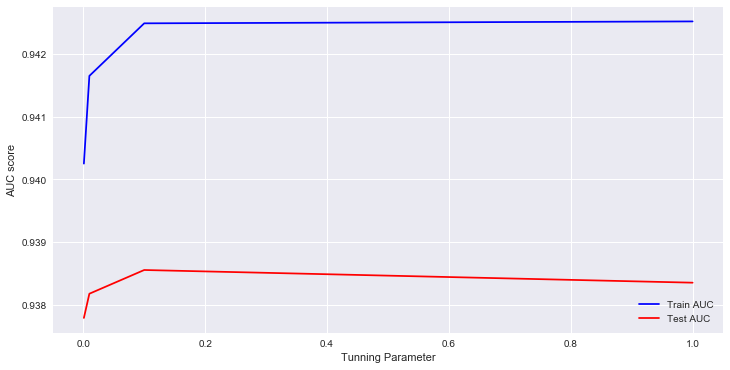

In [61]:
C = [0.001, 0.01, 0.1, 1]
tuning_model(logreg,C)

Lets apply our tunned parameter value for prediction. At 0.1 the train and test set increases together and hence use it for model.

In [201]:
# Initializing Logistic Regression class object
logreg = LogisticRegression(C=0.1)
# Fitting the model
logreg.fit(X_train_resampled, y_train_resampled)

LogisticRegression(C=0.1)

In [202]:
# predicting the train and test data
train_preds = logreg.predict(X_train_resampled)
test_preds = logreg.predict(X_scaled_test)

In [64]:
#Calculating the accuracy score
print('Accuracy: ', accuracy_score(y_test, test_preds))

Accuracy:  0.8631640283577741


In [203]:
# calculating confusion matrix
confusion_matrix(y_test, test_preds)

array([[7875, 1269],
       [ 140, 1013]])

#### Applying Grid Search:

Based on the graph above lets pass the C values to grid search for prediction

In [66]:
C_param = {'C' : [0.001, 0.01, 0.1, 0.2]}

In [67]:
#Initializing GridSearch and fitting it to train set
grid_search = GridSearchCV(estimator=logreg, scoring='accuracy', param_grid=C_param, cv = 3)
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=3, estimator=LogisticRegression(C=0.1),
             param_grid={'C': [0.001, 0.01, 0.1, 0.2]}, scoring='accuracy')

In [68]:
# Finding the best parameter
best_parameters = grid_search.best_params_
best_parameters

{'C': 0.2}

Grid Search have given C value 0.2 has best parameter and let's fit with the regression model

In [204]:
logreg = LogisticRegression(C = 0.2)
logreg.fit(X_train_resampled, y_train_resampled)


LogisticRegression(C=0.2)

In [205]:
# predicting the train and test data
train_preds = logreg.predict(X_train_resampled)
test_preds = logreg.predict(X_scaled_test)


In [71]:
# Creating classification report to find precision,recall,f1-score and support value
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      9144
           1       0.44      0.88      0.59      1153

    accuracy                           0.86     10297
   macro avg       0.71      0.87      0.75     10297
weighted avg       0.92      0.86      0.88     10297



In [72]:
# calculating accuracy score
print('Accuracy: ', accuracy_score(y_test, test_preds))

Accuracy:  0.8633582596872875


In [206]:
# calculating confusion matrix
confusion_matrix(y_test, test_preds)

array([[7879, 1265],
       [ 142, 1011]])

In [74]:
# Function to plot ROC Curve
'''
      Step 1 : Calculate false positive rate and true positive rate
      Step 2 : Calculate roc 
      Step 3 : plot the false positive rate and true positive rate
   
'''
def roc_curves(model):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_resampled, model.predict_proba(X_train_resampled)[:, 1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, model.predict_proba(X_scaled_test)[:, 1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.figure()
    lw = 2
    plt.plot(false_positive_rate, true_positive_rate, color = 'darkorange',
         lw = lw, label = 'ROC curve (area = %0.3f)' % (roc_auc))
    plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = "lower right")
    return plt.show()

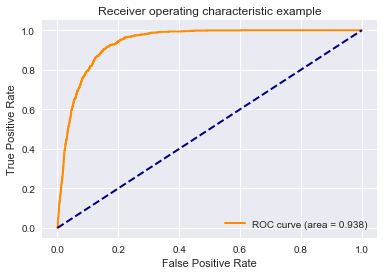

In [75]:
roc_curves(logreg)

### Decision Tree

Next lets try Decision tree model and start with the baseline model

####  BaseLine Model

In [78]:
X = df1.drop('y_yes', axis = 1)
y = df1['y_yes']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

Lets fit the train and test data separately for the gini and entropy

In [80]:
# Instantiate Desicion Tree Classifier model class
decision_entropy = DecisionTreeClassifier(criterion = 'entropy')
# Fitting train and test data
decision_entropy.fit(X_scaled_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [81]:
train_preds = decision_entropy.predict(X_scaled_train)
test_preds = decision_entropy.predict(X_scaled_test)

In [82]:
print('Accuracy: ', accuracy_score(y_test, test_preds))

Accuracy:  0.8891910265125765


In [83]:
#  Instantiate Desicion Tree Classifier model class
decision_gini = DecisionTreeClassifier(criterion = 'gini')
# Fitting train and test data
decision_gini.fit(X_scaled_train, y_train)

DecisionTreeClassifier()

In [84]:
train_preds = decision_gini.predict(X_scaled_train)
test_preds = decision_gini.predict(X_scaled_test)

In [85]:
print('Accuracy: ', accuracy_score(y_test, test_preds))

Accuracy:  0.8855977469165777


#### Applying Smote

In [283]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_scaled_train, y_train)

In [147]:
decision_entropy = DecisionTreeClassifier(criterion = 'entropy')
decision_entropy.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy')

In [88]:
train_preds = decision_entropy.predict(X_train_resampled)
test_preds = decision_entropy.predict(X_scaled_test)

In [89]:
print('Accuracy: ', accuracy_score(y_test, test_preds))

Accuracy:  0.8862775565698747


In [90]:
decision_gini = DecisionTreeClassifier(criterion = 'gini')
decision_gini.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier()

In [91]:
train_preds = decision_gini.predict(X_train_resampled)
test_preds = decision_gini.predict(X_scaled_test)

In [92]:
print('Accuracy: ', accuracy_score(y_test, test_preds))

Accuracy:  0.8775371467417694


####  Tuning for better prediction

Tuning the different parameter for better prediction. Here we are trying for maximum depth,minimum sample split,minimum sample leaf and maximum features

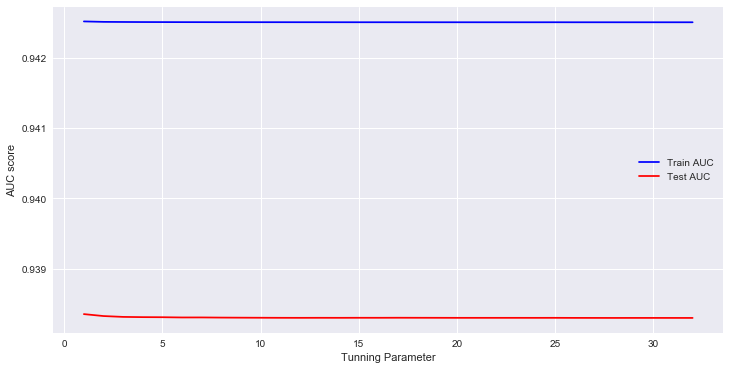

In [154]:
# creating max_depth list and applying it in tuning_model function
max_depth = np.linspace(1,32,32)
tuning_model(decision_entropy,max_depth)


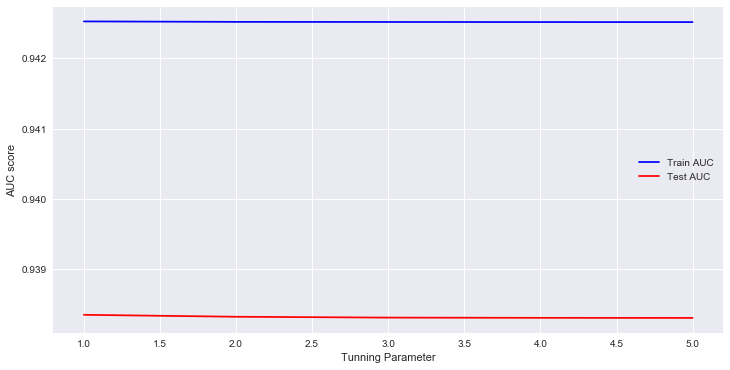

In [156]:
max_depth = [1,2,3,4,5]
tuning_model(decision_entropy,max_depth)

Both train and test set increases constant after 1.5

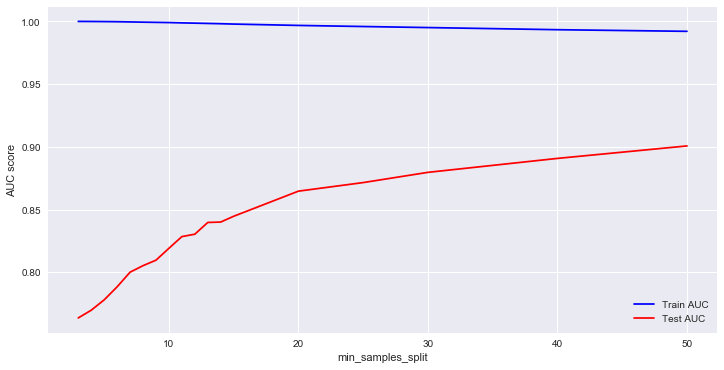

In [94]:
#  creating min_samples_split list and applying it in tuning_model function
min_samples_split=[3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30,40,50]
tuning_model(decision_entropy,min_samples_split)

Lets try min_sample_split for shorter range to see the difference

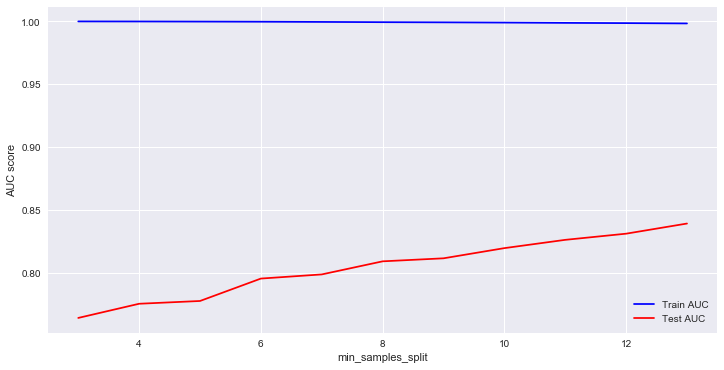

In [95]:
min_samples_split=[3,4,5,6,7,8,9,10,11,12,13]
tuning_model(decision_entropy,min_samples_split)

After value 10 the training data decreases and remains constant.

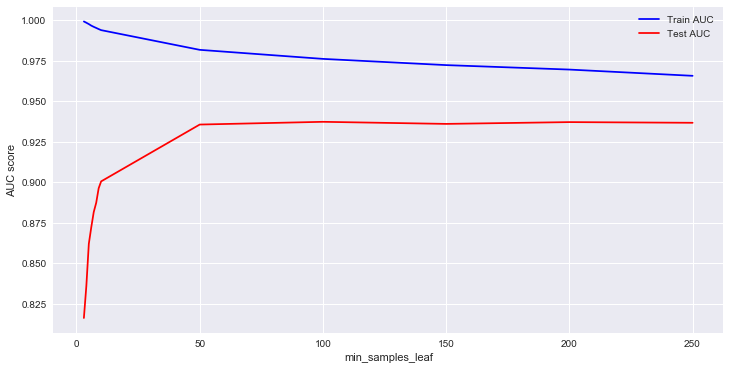

In [96]:
#  creating min_samples_leaf list and applying it in tuning_model function
min_samples_leaf=[3,4,5,6,7,8,9,10,50,100,150,200,250]
tuning_model(decision_entropy,min_samples_leaf)

Lets try min_samples_leaf for shorter range to see the difference

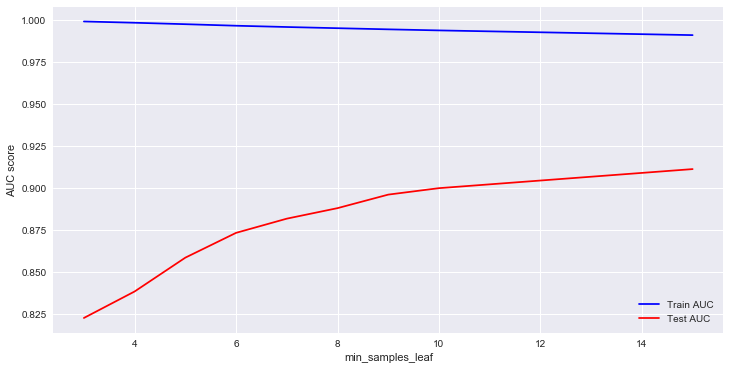

In [97]:
min_samples_leaf=[3,4,5,6,7,8,9,10,15]
tuning_model(decision_entropy,min_samples_leaf)

After value 9 there is no much postive difference

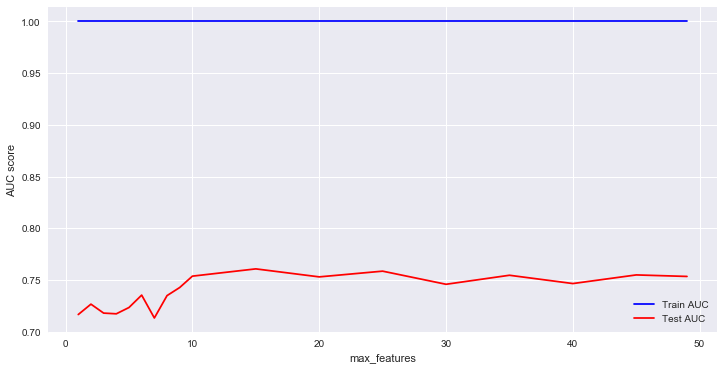

In [99]:
#  creating min_samples_leaf list and applying it in tuning_model function
max_features=[1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,49]
tuning_model(decision_entropy,max_features)

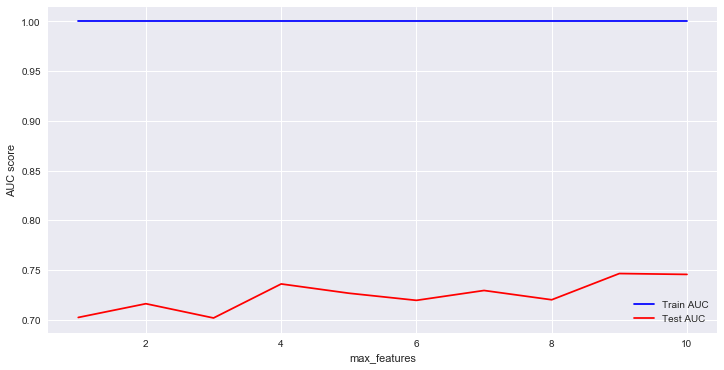

In [100]:
max_features=[1,2,3,4,5,6,7,8,9,10]
tuning_model(decision_entropy,max_features)

After value 7 there is a decrease in test data.

In [187]:
# Applying all are tuned parameter to check for the model prediction
decision_tuning = DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=9,min_samples_split=10,max_features=7)
decision_tuning.fit(X_train_resampled,y_train_resampled)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=7,
                       min_samples_leaf=9, min_samples_split=10)

In [102]:
train_preds=decision_tuning.predict(X_train_resampled)
test_preds=decision_tuning.predict(X_scaled_test)

In [103]:
print('Accuracy: ', accuracy_score(y_test, test_preds))

Accuracy:  0.7968340293289308


In [104]:
decision_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=6,min_samples_split=8,max_features=8)
decision_entropy.fit(X_train_resampled,y_train_resampled)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=8,
                       min_samples_leaf=6, min_samples_split=8)

In [105]:
train_preds=decision_entropy.predict(X_train_resampled)
test_preds=decision_entropy.predict(X_scaled_test)

In [106]:
print('Accuracy: ', accuracy_score(y_test, test_preds))

Accuracy:  0.7244828590851704


#### Applying Grid Search

In [107]:
parameters = {'criterion':['gini','entropy'],'max_depth':[2,3,4,5,6],'min_samples_split':[5,6,7,9,10],'min_samples_leaf':[3,4,5],'max_features':[12,13,14,15] 
    }

In [108]:
decision_grid = DecisionTreeClassifier()
decision_grid.fit(X_train_resampled,y_train_resampled)

DecisionTreeClassifier()

In [109]:
grid_search=GridSearchCV(decision_grid,parameters,cv=3)
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [5, 6, 7, 9, 10]})

In [110]:
# Mean training score
mean_train_score=np.mean(grid_search.cv_results_['mean_score_time'])

# Mean test score
mean_test_score = grid_search.score(X_scaled_test,y_test)

print(f"Mean Training Score: {mean_train_score :.2%}")
print(f"Mean Test Score: {mean_test_score :.2%}")
print(f"Best Parameter :{grid_search.best_params_}")

Mean Training Score: 0.45%
Mean Test Score: 85.00%
Best Parameter :{'criterion': 'gini', 'max_depth': 7, 'max_features': 10, 'min_samples_leaf': 6, 'min_samples_split': 6}


Let us use the best parameter to build our final decision tree model

In [72]:
decision_grid = DecisionTreeClassifier(criterion='gini',max_depth=7,min_samples_leaf=4,min_samples_split=6,max_features=15, random_state=42)
decision_grid.fit(X_train_resampled,y_train_resampled)

DecisionTreeClassifier(max_depth=7, max_features=15, min_samples_leaf=4,
                       min_samples_split=6, random_state=42)

In [73]:
train_preds=decision_grid.predict(X_train_resampled)
test_preds=decision_grid.predict(X_scaled_test)

In [131]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      9144
           1       0.37      0.89      0.53      1153

    accuracy                           0.82     10297
   macro avg       0.68      0.85      0.71     10297
weighted avg       0.92      0.82      0.85     10297



In [74]:
print('Accuracy: ', accuracy_score(y_test, test_preds))

Accuracy:  0.7590560357385646


In [75]:
confusion_matrix(y_test,test_preds)  

array([[6763, 2381],
       [ 100, 1053]])

let us plot feature importance to check which feature is been useful for predicting in our model

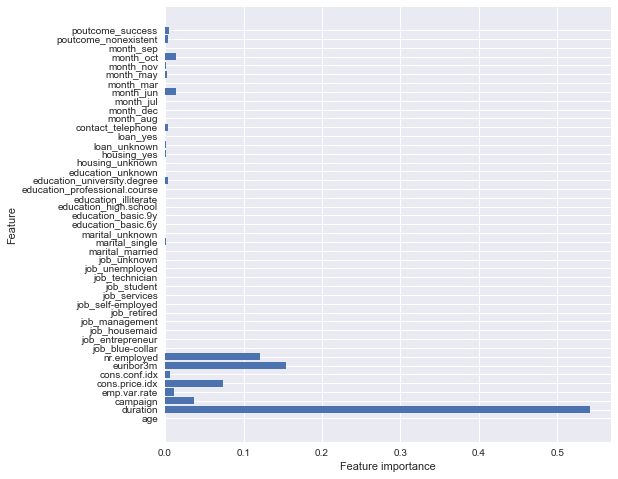

In [76]:
# Function to plot feature importance
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(decision_grid)
plt.savefig('./Images/feature.png', bbox_inches = 'tight')

In [108]:
importances = decision_grid.feature_importances_

feature_list = list(X_train.columns)

feature_results = pd.DataFrame({'feature': feature_list,
                               'importance': importances})

feature_results

,feature,importance
0,age,0.000337
1,duration,0.415033
2,campaign,0.003193
3,emp.var.rate,0.018268
4,cons.price.idx,0.004889
5,cons.conf.idx,0.013673
6,euribor3m,0.022143
7,nr.employed,0.282534
8,job_blue-collar,0.000000
9,job_entrepreneur,0.000041


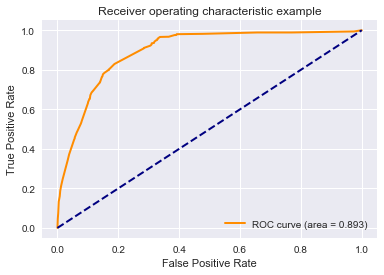

In [85]:
roc_curves(decision_grid)

### XG Boost

####  BaseLine Model

In [118]:
X=df1.drop('y_yes',axis=1)
y=df1['y_yes']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
scaler = StandardScaler()
X_scaled_train=scaler.fit_transform(X_train)
X_scaled_test=scaler.transform(X_test)

In [120]:
# Instantiate XGBClassifier
xgb = XGBClassifier()

# Fit XGBClassifier
xgb.fit(X_scaled_train,y_train)
# Predict on training and test sets
training_preds = xgb.predict(X_scaled_train)
test_preds = xgb.predict(X_scaled_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train,training_preds)
test_accuracy = accuracy_score(y_test,test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 92.0%
Validation accuracy: 91.94%


#### Applying Smote

In [121]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_scaled_train, y_train)

In [296]:
# Instantiate XGBClassifier
xgb = XGBClassifier()

# Fit XGBClassifier

xgb.fit(X_train_resampled,y_train_resampled)
# Predict on training and test sets
training_preds = xgb.predict(X_train_resampled)
test_preds = xgb.predict(X_scaled_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train_resampled,training_preds)
test_accuracy = accuracy_score(y_test,test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 93.54%
Validation accuracy: 89.43%


#### Tunning for better prediction

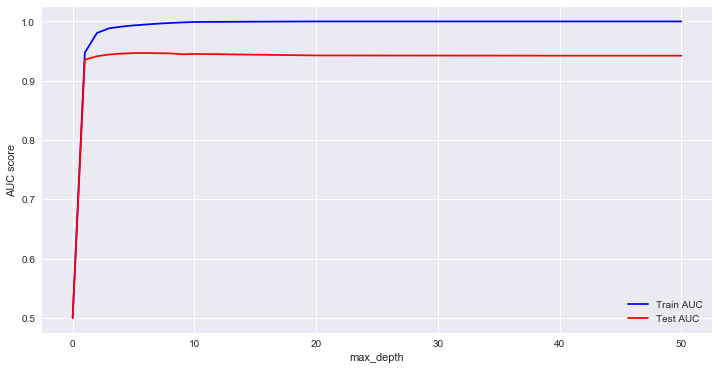

In [123]:
#  creating max_depth list and applying it in tuning_model function
max_depth=[0,1,2,3,4,5,6,7,8,9,10,20,40,50]
tuning_model(xgb,max_depth)

After value 10 train and test data looks stable. Hence reducing the max_depth value

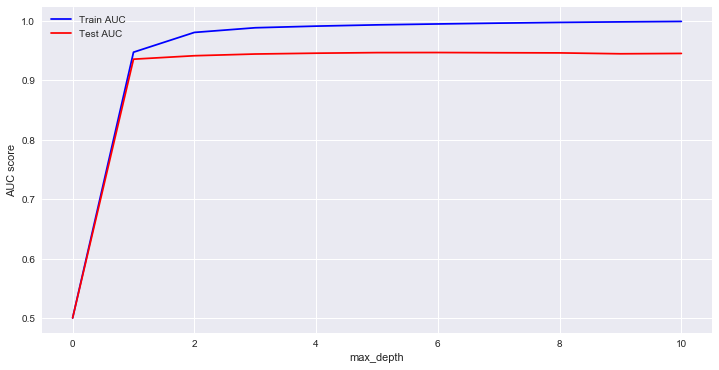

In [124]:
max_depth=[0,1,2,3,4,5,6,7,8,9,10]
tuning_model(xgb,max_depth)

At max_depth 1 ,the train and test data drastically increases

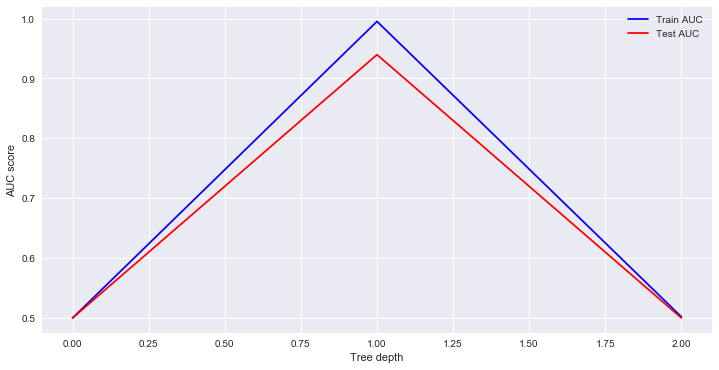

In [125]:
#  creating learning_rate list and applying it in tuning_model function
learning_rate=[0,1,2]
tuning_model(xgb,learning_rate)

After learning_rate 1 the value of train and test decreases. Let us check value within 1.

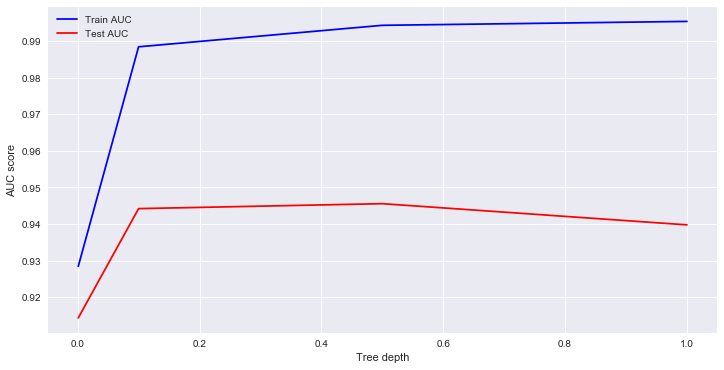

In [126]:
learning_rate=[0.001,0.1,0.5,1]
tuning_model(xgb,learning_rate)

After learning rate  0.6 ,the train and test data decreases and futher reducing the values to check the result.

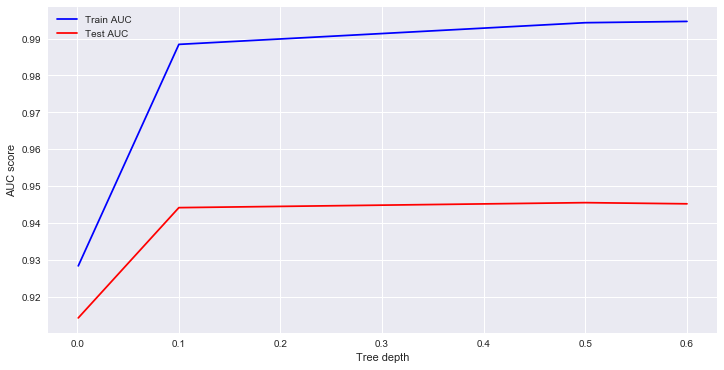

In [127]:
learning_rate=[0.001,0.1,0.5,0.6]
tuning_model(xgb,learning_rate)

Learning rate of 0.1 looks good as both train and test data increases.

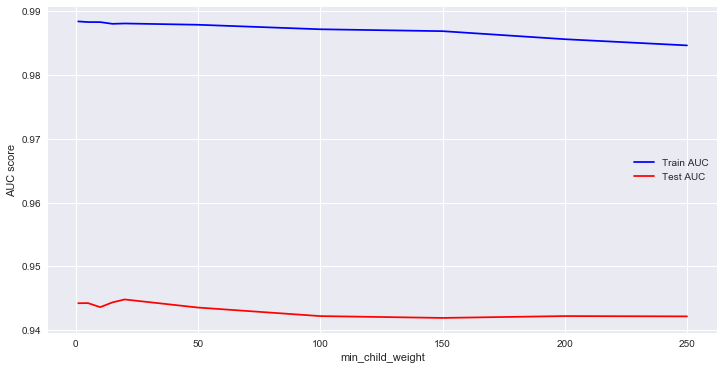

In [128]:
#  creating min_child_weight list and applying it in tuning_model function
min_child_weight=[1,5,10,15,20,50,100,150,200,250]
tuning_model(xgb,min_child_weight)

Lets minimize our min_child_weight range has after value 30 the train and test data decreases

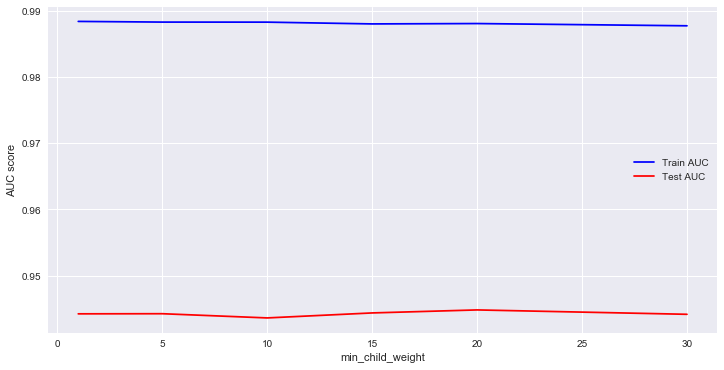

In [129]:
min_child_weight=[1,5,10,15,20,30]
tuning_model(xgb,min_child_weight)

Let us reduce the min_child_weight range futher more for clearer view

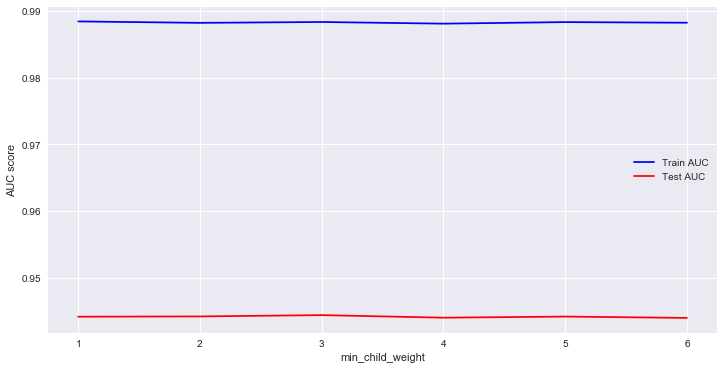

In [130]:
min_child_weight=[1,2,3,4,5,6]
tuning_model(xgb,min_child_weight)

min_child_weight of 1 looks good as both train and test data have similar results

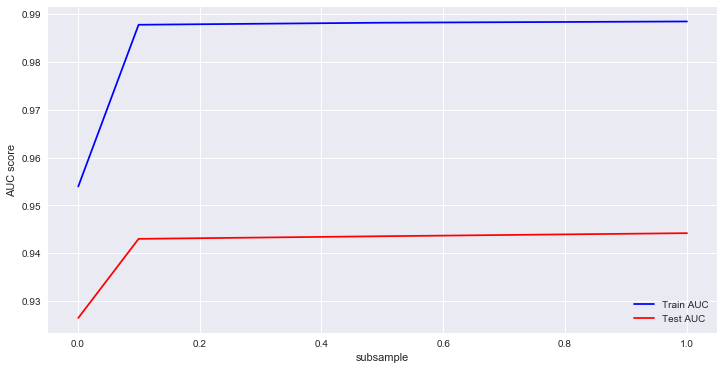

In [131]:
#  creating subsample list and applying it in tuning_model function
subsample=[0.001,0.1,0.5,1]
tuning_model(xgb,subsample)

Lets take subsample space value of 0.1 has both train and train data increases at the both

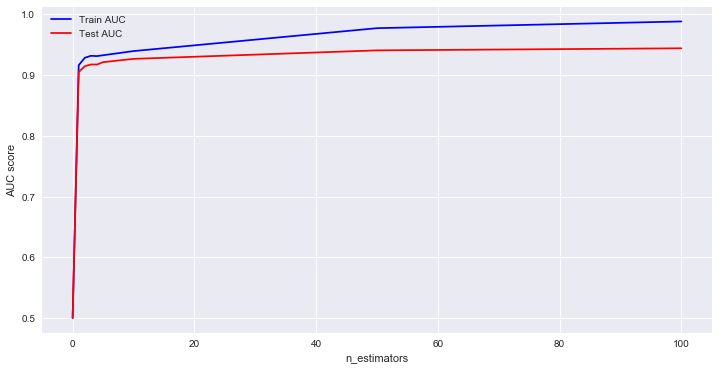

In [132]:
#  creating n_estimators list and applying it in tuning_model function
n_estimators=[0,1,2,3,4,10,20,30,50,70,90,100,120,200,250,300]
tuning_model(xgb,n_estimators)


After n_estimators value of 100, train and test data remains unchanged

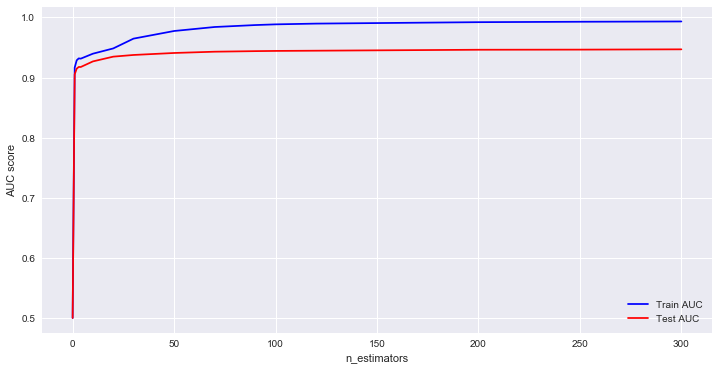

In [133]:
n_estimators=[0,1,2,3,4,5,10,50,100]
tuning_model(xgb,n_estimators)

At n_estimator value of 100, train and test data increases. Now lets build our tuned model 

In [64]:
# Instantiate XGBClassifier
xgb = XGBClassifier(learning_rate=0.1,max_depth=1,min_child_weight=1,n_estimators=100,subsample=0.1)

# Fit XGBClassifier

xgb.fit(X_train_resampled,y_train_resampled)
# Predict on training and test sets
training_preds = xgb.predict(X_train_resampled)
test_preds = xgb.predict(X_scaled_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train_resampled,training_preds)
test_accuracy = accuracy_score(y_test,test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 89.1%
Validation accuracy: 86.65%


In [58]:
xgb.score(X_scaled_test, y_test)

0.6324172088957949

In [59]:
confusion_matrix(y_test,test_preds)

array([[5539, 3605],
       [ 180,  973]])

#### Applying Grid Search

In [65]:
param_grid = {
    'learning_rate': [0.1, 0.5],
    'max_depth': [5,6],
    'min_child_weight': [2, 3],
    'subsample': [0.1,0.2],
    'n_estimators': [100],
}

In [138]:
grid_clf = GridSearchCV(xgb,param_grid,scoring='accuracy',cv=3,n_jobs=1)
grid_clf.fit(X_train_resampled,y_train_resampled)

best_parameters = grid_clf.best_params_
best_parameters

{'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 1,
 'n_estimators': 100,
 'subsample': 0.2}

Lets apply our best parameter value to build final model

In [62]:
# Instantiate XGBClassifier
xgb = XGBClassifier(learning_rate=0.1,max_depth=6,min_child_weight=3,n_estimators=100,subsample=0.1)

# Fit XGBClassifier

xgb.fit(X_train_resampled,y_train_resampled)
# Predict on training and test sets
training_preds = xgb.predict(X_train_resampled)
test_preds = xgb.predict(X_scaled_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train_resampled,training_preds)
test_accuracy = accuracy_score(y_test,test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 94.55%
Validation accuracy: 90.55%


In [98]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      9144
           1       0.55      0.78      0.64      1153

    accuracy                           0.90     10297
   macro avg       0.76      0.85      0.79     10297
weighted avg       0.92      0.90      0.91     10297



In [99]:
xgb.score(X_scaled_test, y_test)

0.9030785665727882

In [63]:
confusion_matrix(y_test,test_preds)

array([[8471,  673],
       [ 300,  853]])

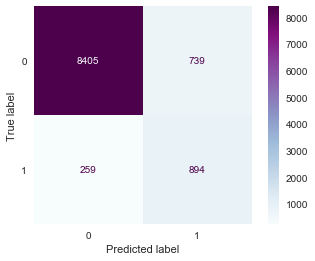

In [101]:
plot_confusion_matrix(xgb, X_scaled_test, y_test,cmap = plt.cm.BuPu)
plt.grid(False)

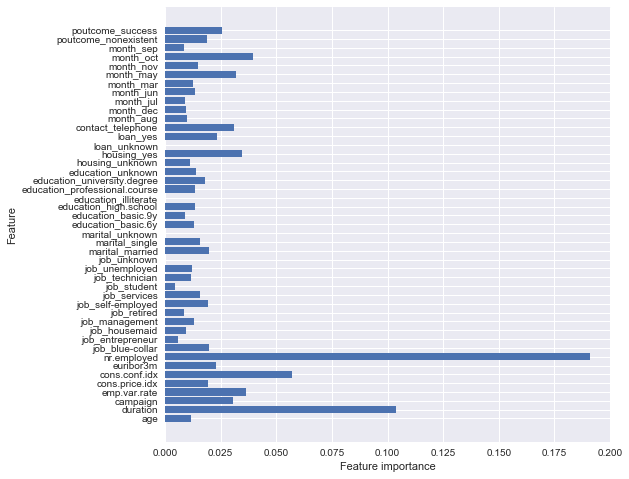

In [102]:
plot_feature_importances(xgb)

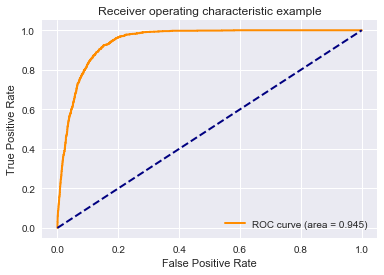

In [135]:
roc_curves(xgb)

### KNN Algorithm

#### BaseLine Model

In [44]:
X=df1.drop('y_yes',axis=1)
y=df1['y_yes']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
scaler = StandardScaler()
X_scaled_train=scaler.fit_transform(X_train)
X_scaled_test=scaler.transform(X_test)

In [146]:
knn=KNeighborsClassifier()

In [147]:
knn.fit(X_scaled_train,y_train)

KNeighborsClassifier()

In [148]:
train_preds=knn.predict(X_scaled_train)
test_preds=knn.predict(X_scaled_test)

In [149]:
print('Accuracy:%s'%(accuracy_score(y_test,test_preds)))

Accuracy:0.898222783334952


#### Applying Smote

In [46]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_scaled_train, y_train)

In [151]:
knn=KNeighborsClassifier()

In [152]:
knn.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier()

In [153]:
train_preds=knn.predict(X_train_resampled)
test_preds=knn.predict(X_scaled_test)

In [154]:
print('Accuracy:%s'%(accuracy_score(y_test,test_preds)))

Accuracy:0.8372341458677285


#### Tunning the model for better prediction

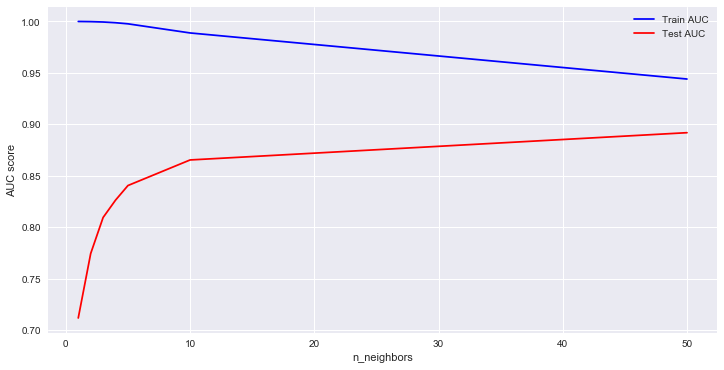

In [155]:
n_neighbors=[1,2,3,4,5,10,50]
tuning_model(knn,n_neighbors)

At n_neighbor value of 5 ,train and test data increases and we will build our model on that value.

In [ ]:
# Instantiate KNeighborsClassifier class
knn=KNeighborsClassifier(n_neighbors=5)
#Fitting the model with tarin and test data
knn.fit(X_train_resampled, y_train_resampled)

In [ ]:
# predicting train and test data
train_preds=knn.predict(X_train_resampled)
test_preds=knn.predict(X_scaled_test)

In [368]:
# Calculating accuracy score
print('Accuracy:%s'%(accuracy_score(y_test,test_preds)))

Accuracy:0.863552491016801


#### Applying Grid Search

In [156]:
knn_parameters = {'n_neighbors': range(1,11)}

In [157]:
grid_clf = GridSearchCV(estimator=knn,param_grid=knn_parameters,scoring='accuracy',cv=3,n_jobs=1)
grid_clf.fit(X_train_resampled, y_train_resampled)

best_parameters = grid_clf.best_params_
best_parameters

{'n_neighbors': 1}

In [111]:
knn=KNeighborsClassifier(n_neighbors=1)

In [112]:
knn.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(n_neighbors=1)

In [113]:
train_preds=knn.predict(X_train_resampled)
test_preds=knn.predict(X_scaled_test)

In [114]:
print('Accuracy:%s'%(accuracy_score(y_test,test_preds)))

Accuracy:0.8716130911916092


In [115]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      9144
           1       0.44      0.51      0.47      1153

    accuracy                           0.87     10297
   macro avg       0.69      0.71      0.70     10297
weighted avg       0.88      0.87      0.88     10297



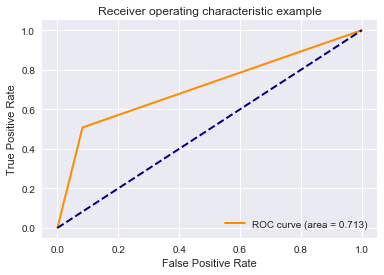

In [136]:
roc_curves(knn)

## Comparison of Accuracy and confusion matrix for all model

In [68]:
models = []
model1 = LogisticRegression(C=0.2)
models.append(model1)
model2 = DecisionTreeClassifier(criterion='gini',max_depth=7,min_samples_leaf=4,min_samples_split=6,max_features=15,random_state=42)
models.append(model2)
model3 = XGBClassifier(learning_rate=0.1,max_depth=6,min_child_weight=3,n_estimators=100,subsample=0.2, random_state=42)
models.append(model3)
model4 = KNeighborsClassifier(n_neighbors=1)
models.append(model4)

for n in models:
    n.fit(X_train_resampled,y_train_resampled)
    train_preds = n.predict(X_train_resampled)
    test_preds = n.predict(X_scaled_test)
    acc=accuracy_score(y_test, test_preds)
    conf=confusion_matrix(y_test, test_preds)
    print('Classification Report of %s :%s' %(n,classification_report(y_test, test_preds)), '\n', 'Confusion Matrix of %s :%s' %(n,confusion_matrix(y_test,test_preds)))


Classification Report of LogisticRegression(C=0.2) :              precision    recall  f1-score   support

           0       0.98      0.86      0.92      9144
           1       0.45      0.88      0.59      1153

    accuracy                           0.86     10297
   macro avg       0.71      0.87      0.76     10297
weighted avg       0.92      0.86      0.88     10297
 
 Confusion Matrix of LogisticRegression(C=0.2) :[[7880 1264]
 [ 137 1016]]
Classification Report of DecisionTreeClassifier(max_depth=7, max_features=15, min_samples_leaf=4,
                       min_samples_split=6, random_state=42) :              precision    recall  f1-score   support

           0       0.99      0.74      0.85      9144
           1       0.31      0.91      0.46      1153

    accuracy                           0.76     10297
   macro avg       0.65      0.83      0.65     10297
weighted avg       0.91      0.76      0.80     10297
 
 Confusion Matrix of DecisionTreeClassifier(max_depth=7, 

## Interpret:

* Apart from precision and recall value, feature importance and  confusion matrix plays important role here in deciding our final model.

* Logistic regression and KNN has good recall and precision value but the false negative and false positive is little higher

* It is more important to reduce the number of false negative in this scenario as the customer who deposited is falsely predicted as not deposited by the model.

* Interpretation of Logistic regression is tedious and decision tree are safer to use 

* On comparing  Decision Tree and XG Boost, decision tree has predicted the feature importance correctly as the duration has the significant result compared to 'nr_employe' which we plotted in our analysis.


#### Decision Tree

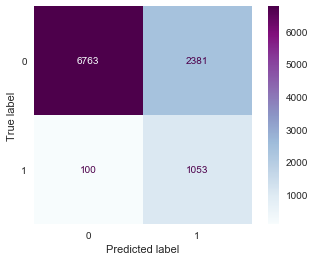

In [69]:
plot_confusion_matrix(model2, X_scaled_test, y_test,cmap = plt.cm.BuPu)
plt.grid(False)


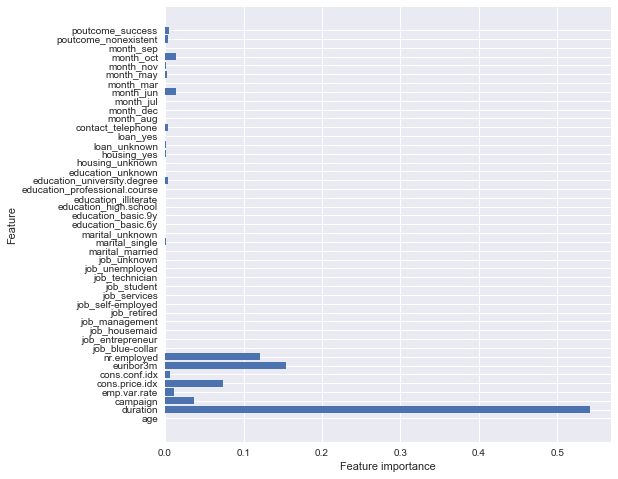

In [77]:
plot_feature_importances(model2)

#### XG Boost Model

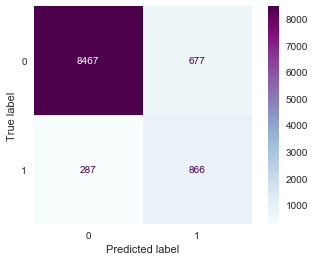

In [78]:
plot_confusion_matrix(model3, X_scaled_test, y_test,cmap = plt.cm.BuPu)
plt.grid(False)

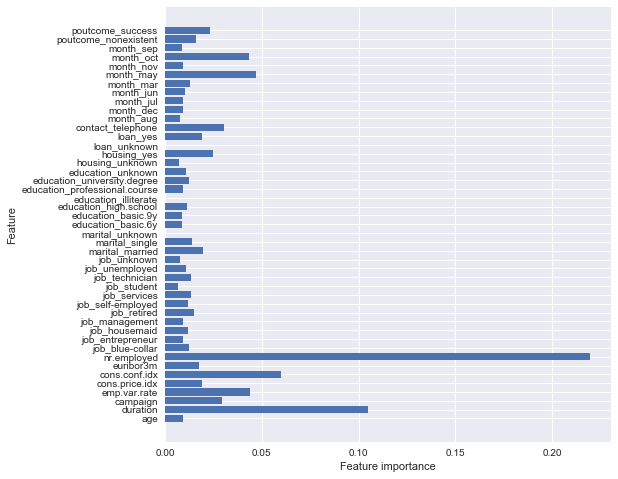

In [79]:
plot_feature_importances(model3)

In [80]:
importances = model3.feature_importances_

feature_list = list(X_train.columns)

feature_results = pd.DataFrame({'feature': feature_list,
                               'importance': importances})

feature_results

,feature,importance
0,age,0.009410
1,duration,0.105039
2,campaign,0.029305
3,emp.var.rate,0.043885
4,cons.price.idx,0.019129
5,cons.conf.idx,0.059915
6,euribor3m,0.017726
7,nr.employed,0.219720
8,job_blue-collar,0.012231
9,job_entrepreneur,0.009189


In [81]:
importance_types = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']
f = 'weight'
model3.get_booster().get_score()

{'f1': 502,
 'f7': 75,
 'f44': 54,
 'f30': 158,
 'f27': 73,
 'f3': 89,
 'f33': 71,
 'f23': 22,
 'f5': 94,
 'f0': 347,
 'f4': 139,
 'f2': 397,
 'f41': 38,
 'f6': 368,
 'f24': 50,
 'f32': 57,
 'f39': 50,
 'f43': 66,
 'f15': 14,
 'f19': 72,
 'f12': 8,
 'f11': 12,
 'f16': 41,
 'f8': 35,
 'f36': 15,
 'f37': 14,
 'f26': 25,
 'f14': 10,
 'f35': 2,
 'f40': 21,
 'f42': 4,
 'f17': 2,
 'f22': 8,
 'f20': 38,
 'f10': 4,
 'f38': 6,
 'f34': 12,
 'f9': 3,
 'f28': 8,
 'f13': 8,
 'f18': 1,
 'f29': 2}

In [82]:
importance_types = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']
f = 'gain'
model3.get_booster().get_score()

{'f1': 502,
 'f7': 75,
 'f44': 54,
 'f30': 158,
 'f27': 73,
 'f3': 89,
 'f33': 71,
 'f23': 22,
 'f5': 94,
 'f0': 347,
 'f4': 139,
 'f2': 397,
 'f41': 38,
 'f6': 368,
 'f24': 50,
 'f32': 57,
 'f39': 50,
 'f43': 66,
 'f15': 14,
 'f19': 72,
 'f12': 8,
 'f11': 12,
 'f16': 41,
 'f8': 35,
 'f36': 15,
 'f37': 14,
 'f26': 25,
 'f14': 10,
 'f35': 2,
 'f40': 21,
 'f42': 4,
 'f17': 2,
 'f22': 8,
 'f20': 38,
 'f10': 4,
 'f38': 6,
 'f34': 12,
 'f9': 3,
 'f28': 8,
 'f13': 8,
 'f18': 1,
 'f29': 2}

**True Positives** : 866(Number of customer who deposited )\
**True Negatives** : 8467(Number of customer who didnot deposit)\
**False Positive** : 677(Number of customer who didn't deposit but predicted as deposited)\
**False Negative** : 287(Number of customer who deposited but predicted as not deposited)\
In this scenario, it is highly important to reduce the False Negative number as much as possible.
The XG Boost  model having precision of 0.97 which predicting the True positive from the overall predicted  positive with 97% accuracy . The recall value of 0.93 which is predicting the True positive from the actual positive with 81% accuracy.



## Recommendations/Conclusion:

* From our overall analysis duration plays the important role . More the people who are engaged in call are likely to make deposit. 

* As the euribor rate increases ,the number of people employed and the consumer price index increases which indicates the betterment of the country's economy. Hence country's economy condition plays a vital role here. Better the economy more number of people making deposit.

* People working as technicians, admin and blue collar jobs are targeted for the campaign and they are more likely to place deposit.

## Next Step:

* Futhure work would be on reducing the false negative cases and to build a more stable model to improve the performance.
* Total actual deposit made by the customers were just 9% from the overall customers. Hence more analyis is needed to check how many people deposit without conducting campaign to check if the campaign is beneficial to the bank or waste of cost and resorces. 

In [51]:
importance_types = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']
f = 'weight'
model3.get_booster().get_score()

{'f1': 596,
 'f7': 83,
 'f44': 62,
 'f14': 22,
 'f30': 159,
 'f27': 60,
 'f19': 83,
 'f3': 96,
 'f33': 90,
 'f23': 34,
 'f43': 66,
 'f5': 134,
 'f0': 449,
 'f6': 437,
 'f4': 162,
 'f2': 428,
 'f41': 47,
 'f32': 74,
 'f9': 8,
 'f37': 20,
 'f39': 53,
 'f15': 21,
 'f28': 13,
 'f12': 11,
 'f11': 12,
 'f8': 37,
 'f13': 13,
 'f24': 51,
 'f16': 53,
 'f18': 2,
 'f36': 20,
 'f10': 11,
 'f34': 16,
 'f35': 2,
 'f40': 23,
 'f42': 12,
 'f26': 34,
 'f17': 6,
 'f20': 42,
 'f22': 9,
 'f38': 11,
 'f29': 3}